# OpenCV. Computer Vision

### Работа с изображениями и видео

<b>OpenCV (Open Source Computer Vision Library)</b> располагает широким инструментарием для обработки исходных изображений: фильтрация, геометрические преобразования, преобразования цветовых пространств и многое-многое другое.

<img src="opencvpython.png"/>

<b>Мы будем использовать в нашей работе</b>:
1. <i>Python 3.7</i> и среду разработки <i>JetBrains PyCharm IDE</i>
2. <i>Jupyter Notebooks</i> (включено в небезызвестный пакет <i>Anaconda</i>)
3. Библиотеки <i>OpenCV (cv2)</i> и <i>matplotlib</i> для использования методов компьютерного зрения и для визуализации данных соответственно.
4. <b>...нашу инженерскую смекалочку!</b>

Для полноценной работы с компьютерным зрением необходимо уметь приводить данные изображения в удобный для распознавания образов вид. Но для начало необходимо загрузить необходимые модули!


In [335]:
# Импортируем необходимые модули (библиотеки)
import matplotlib.pyplot as plt 
import cv2

Для импортирования ("чтения") изображения для каких-либо действий с ним существует функция ```cv2.imread() ```, а для показа изображения в каком-либо окне - ```cv2.imshow() ```.

Для записи исходного изображения в файл используется функция ```cv2.imwrite('image_title.jpg', image) ```.

In [209]:
# Первый аргумент - путь к файлу (с названием формата!)
# Второй аргумент - режим чтения изображения
image = cv2.imread('elon.jpg', cv2.IMREAD_COLOR)
print('Ширина изображения: ' + str(image.shape[0]) + '\nВысота изображения: ' + 
      str(image.shape[1]) + '\nСлои (синий, зелёный, красный): ' + str(image.shape[2]))
# Выводим матричное представление нашего изображения
image

Ширина изображения: 412
Высота изображения: 550
Слои (синий, зелёный, красный): 3


array([[[188, 190, 190],
        [188, 190, 190],
        [188, 190, 190],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[188, 190, 190],
        [188, 190, 190],
        [188, 190, 190],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[188, 190, 190],
        [188, 190, 190],
        [188, 190, 190],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       ...,

       [[234, 235, 233],
        [234, 235, 233],
        [234, 235, 233],
        ...,
        [212, 210, 209],
        [212, 210, 209],
        [212, 210, 209]],

       [[234, 235, 233],
        [234, 235, 233],
        [234, 235, 233],
        ...,
        [212, 210, 209],
        [212, 210, 209],
        [212, 210, 209]],

       [[234, 235, 233],
        [234, 235, 233],
        [234, 235, 233],
        ...,
        [212, 210, 209],
        [212, 210, 209],
        [212, 210, 209]]

#### Вторым аргументом могут быть следующие режимы:
1. ```cv.IMREAD_COLOR``` - загрузка цветного изображения. Полупрозрачность и прозрачность игнорируются. Этот режим стоит "по умолчанию", поэтому если Вы хотите загрузить цветное изображение с игнорированием прозрачности, есть возможность оставить второй аргумент пустым. Кодовый номер режима ```1```.
2. ```cv.IMREAD_GRAYSCALE``` - загрузка полутонового (в серых тонах) изображения. Используется в решении проблем компьютерного зрения чаще всего. Кодовый номер режима ```0```.
3. ```cv.IMREAD_UNCHANGED``` - загрузка цветного изображения с учетом полупрозрачности и прозрачности. Кодовый номер режима ```-1```.
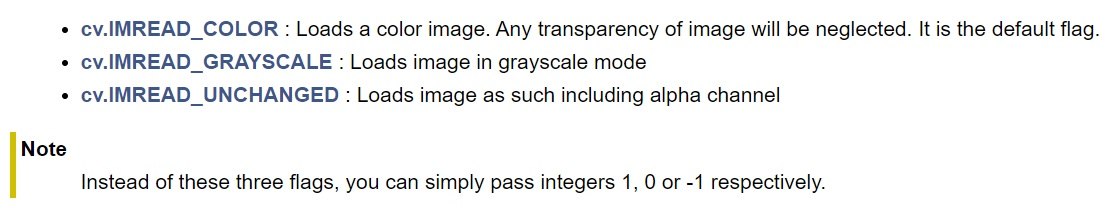

##### Примечание!
Если путь к изображению неправильный, внутренняя ошибка компиляции или исключение не будут вызваны. Программа вернёт ```None``` - константу, предопределенную языком Python, которая представляет из себя отсутствующее значение (ничто). Служит для отлова логических ошибок, когда конкретное значение отсутствует.

In [210]:
# Попробуем прочитать цветную (второй аргумент по умолчанию)
# картинку cybertruck.jpg...
test_image = cv2.imread('cybertruck.jpg') 
print(test_image) # None

# Но если попробуем вывести само изображение в отдельном окне
## cv2.imshow('test', test_image)

None


In [211]:
# Главная идея - проверка при помощи условного оператора if - elif - else
test_image = cv2.imread('tesla_car.jpg')
if test_image == None:
    print('Изображение не найдено. Перепроверьте путь к нему!')
else:
    print('Изображение в виде матрицы: ', test_image)
    cv2.imshow(test_image)

Изображение не найдено. Перепроверьте путь к нему!


Попробуем отобразить наше изображение в отдельном окне при помощи функции ```plt.imshow(<image>)``` из модуля визуализации даннных ```matplotlib```, где единственным аргументом является матричное представление нашего изображения.
Мы должны всегда иметь в виду, что:
1. Изображения в модуле ```matplotlib``` обычно представлены в виде классической модели RGB (Red, Green Blue), в то время, как
2. В модуле ```cv2``` изображения обычно представлены моделью BGR (Blue, Green, Red).

### Важно!
Поэтому очень важно преждевременно конвертировать наше BRG-изображение, с которым мы работаем, используя ```opencv```, в RGB-модель. Для этого используем следующую функцию: ```cv2.cvtColor(image, cv2.COLOR_BGR2RGB)```. 

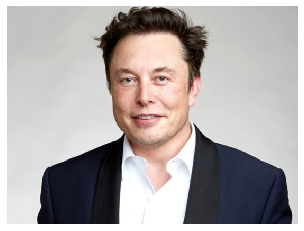

In [212]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.axis('off')
plt.show()

# Если бы мы работали не в Jupiter Notebooks, а с элементами GUI Windows (окнами)

# Отображаем в окне 'image'
## cv2.imshow('image', image)
# Ждем любой ключ (нажатие любой клавиши) неопределенное время (аргумент 0 - неопределенное время, иначе - время в мс)
## cv2.waitKey(0)
# Уничтожаем все созданные с помощью модуля cv2 окна. 
# Если надо уничтожить лишь одно окно - используем функцию cv2.destroyWindow(0)
## cv2.destroyAllWindows()

### Особый случай
Иногда нам нужно создать пустое окно жо того, как мы загрузим какое-либо изображение в него. Возникает следующий вопрос:

#### Как же можно настроить поведение окна в случае вставки изображения в него? Как будут меняться его размеры?
Для определения поведения существует функция ```cv2.namedWindow('image', cv2.WINDOW_NORMAL)```. В качестве первого аргумента принимается название окна, в качестве второго - режим изменения размеров окна.
Всего существует три режима:
1. ```cv2.WINDOW_NORMAL``` - размеры окна могут быть изменены пользователем.
2. ```cv2.WINDOW_AUTOSIZE``` - размер "подгоняется" жестко под размеры размещаемого изображения.
3. ```cv2.WINDOW_OPENGL``` - обеспечивается поддержка OpenGL. Нам это не потребуется :)

### Попробуем применить наши знания на практике. 

## WARNING: запускать в PyCharm'е (или любой другой IDE)!
```
import cv2 as cv

img = cv.imread('elon.jpg', cv.IMREAD_COLOR)
falconx_img = cv.imread('falconx.jpg', cv.IMREAD_GRAYSCALE)

img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
cv.namedWindow('elon_photo', cv.WINDOW_NORMAL)
cv.imshow('elon_photo', img)

print('Image size: ', img.shape[0], 'x', img.shape[1])

key = cv.waitKey(0) & 0xFF

if key == 27:
    cv.destroyAllWindows()
elif key == ord('q'):
    cv.imshow('elon_photo', falconx_img)
    cv.destroyAllWindows()
    
```

### Программа для проверки номера (ключа) любой клавиши на клавиатуре.
<img src="jup1.png" style="height:500px"/>
Ссылка на дискуссию: 

https://stackoverflow.com/questions/14494101/using-other-keys-for-the-waitkey-function-of-opencv

### Деформации изображения: изменение размера, поворот, размытие

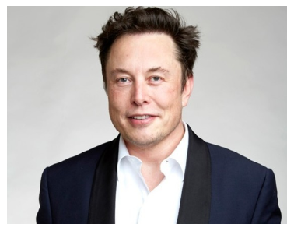

In [213]:
# Изменение масштабов изображения
img = cv2.imread('elon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Вариант 1. Изменение размеров
image_resized = cv2.resize(img, (360, 280))

# Визуализация изображения
plt.axis('off')
plt.imshow(image_resized)
plt.show()

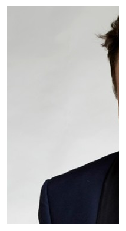

In [214]:
# Вариант 2. Получение среза 
image_resized = img[10:380, 10:200]

# Визуализация изображения
plt.axis('off')
plt.imshow(image_resized)
plt.show()

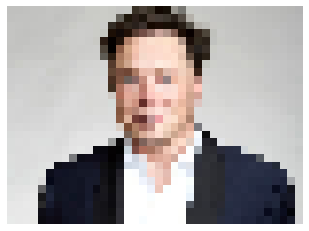

In [336]:
# Вариант 3. Изменение разрешения (или быстрый пиксел-арт)
scale_percent = 7
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
image_resized = cv2.resize(img, dim)

# Визуализация изображения
plt.axis('off')
plt.imshow(image_resized)
plt.show()

### Поворот изображения на заданный угол. Использование матрицы поворота

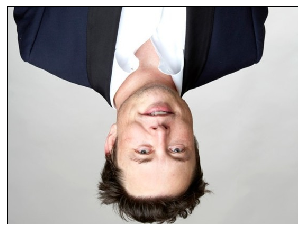

In [341]:
image = cv2.imread('elon.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Считываем высоту, ширину и кол-во каналов
(h, w, d) = image.shape
# Поиск центра 
center = (w // 2, h // 2)
# Находим МАТРИЦУ ПОВОРОТА (RotationMatrix2D)
M = cv2.getRotationMatrix2D(center, 180, 1.0)
image_rotated = cv2.warpAffine(image, M, (w, h))

# Визуализация изображения
plt.axis('off')
plt.imshow(image_rotated)
plt.show()

## Перевод в градации серого и чёрно-белое изображение по порогу

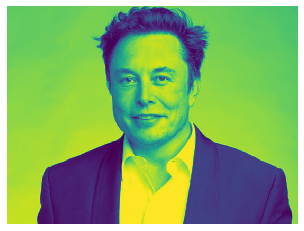

In [352]:
# Полутоновое представление и черно-белое представление
elon_img = cv2.imread('elon.jpg')
elon_img = cv2.cvtColor(elon_img, cv2.COLOR_RGB2BGR)
gray_image = cv2.cvtColor(elon_img, cv2.COLOR_RGB2GRAY)

# Визуализация изображения
plt.axis('off')
plt.imshow(gray_image)

# Упс! Что-то пошло не так. 
# Причина в том, что matplotlib читает в RGB, а OpenCV в BGR! 
# Пробуем в PyCharm'e.
plt.show()

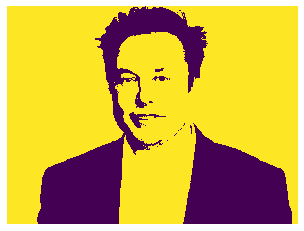

In [356]:
# Черно-белое представление
ret, threshold = cv2.threshold(gray_image, 127, 255, 0)

# Визуализация изображения
plt.axis('off')
plt.imshow(threshold)
plt.show()

1. ```gray_image``` - это одноканальная версия нашего изображения, т.е. имеющая полутоновое представление, удобное для многих алгоритмов компьютерного зрения.
2. ```threshold``` - изображение, в котором все пиксели, имеющие значение меньше 127, будут заменены на 50, а все, которые больше 127, будут заменены на 180. Это некое пороговое значение применяется к каждому пикселю изображения соответственно. 

### Размытие по Гауссу
При помощи функции Гаусса, реализованнной в модуле ```cv2``` в виде ```cv2.GaussianBlur(image_name, (x_blur, y_blur), sigmaX, sigmaY)``` можно добиться нужного уровня размытия или сглаживания (зависит от желания программиста и, прежде всего, разрешения самого изображения). Эта функция служит для приведения зернистого, резкого изображения в более удобный для распознавания образов вид.

Самые важные параметры, которые стоит учесть:
1. ```image_name``` - название изображения;
2. ```(x_blur, y_blur)``` - размытие по осям X и Y соответственно. Чем больше численное значение, тем сильнее пиксели "размывает" вдоль соответствующих осей.

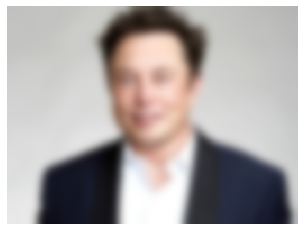

In [238]:
elon_img = cv2.imread('elon.jpg', cv2.IMREAD_COLOR)
elon_img = cv2.cvtColor(elon_img, cv2.COLOR_RGB2BGR)
blurred = cv2.GaussianBlur(elon_img, (25, 25), 0, 0)

# Визуализация изображения
plt.axis('off')
plt.imshow(blurred)
plt.show()

Больше про размытие и сглаживание: https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

## Немного порисуем!
Типичной задачей компьютерного зрения является распознавание объектов на изображении и их последующая маркировка при помощи ТЕКСТА и ГРАФИЧЕСКИХ ПРИМИТИВОВ - прямоугольников, овалов, линий. 

Для этого будем использовать такие функции, как ```cv2.rectangle()```, ```cv2.ellipse()```, ```cv2.arrowedLine()```, ```cv2.line()```, ```cv2.putText()```.

<img src="kakyoin.jpg" style="height:200px"/>


Size:  412 x 550


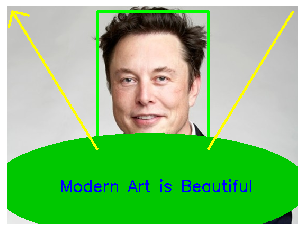

In [322]:
img = cv2.imread('elon.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Для удобства выведем длину-ширину изображения
print('Size: ', img.shape[0], 'x', img.shape[1])

# Разместив несколько прямоугольников и линий на изображении
cv2.rectangle(img, (170, 10), (380, 260), (0, 255, 0), 4)

# Когда аргумент толщины равняется -1, мы полностью заливаем нашу фигуру цветом!
cv2.ellipse(img, (270, 340), (300, 100), 0, 0, 360, (0, 200, 0), -1)

cv2.arrowedLine(img, (170, 270), (10, 10), (255, 255, 0), 3)
cv2.line(img, (380, 270), (540, 10), (255, 255, 0), 3)
cv2.putText(img, 'Modern Art is Beautiful', (100, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Визуализация результирующего изображения
plt.axis('off')
plt.imshow(img)
plt.show()

## Примечание: 
Координаты изображений модуля ```cv2``` могут слегка отличаться от классической системы координат, к которой вы привыкли.

<b>Нулевая точка отсчета для оси Y находится в левом верхнем углу и чем ниже мы опускаемся, тем больше будет значение Y!</b> 

Больше о рисовании графических фигур и текста: https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html



In [334]:
# Задание констант для удобства
# и первоначальная конфигурация размеров окна для воспроизведения видео
cameraPort = 0
frame_w = 640
frame_h = 480

cap = cv2.VideoCapture(cameraPort, cv2.CAP_DSHOW)
print('Ширина окна до преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Высота окна до преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_w)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_h)

print('Ширина окна после преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Высота окна после преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

Ширина окна до преобразования:  640
Высота окна до преобразования:  480
Ширина окна после преобразования:  640
Высота окна после преобразования:  480


### Думай, как пользователь (ЮЗВЕРЬ)!

Задача инженера не только уметь писать правильный и гибкий код, но и предусмотреть все "тараканы" пользователя. Что придет ему в голову - честно говоря, неизвестно никогда.

<b>Система должна быть устойчивой к любой проблеме</b>, даже когда пользователь или другой специлист пытается творить самые страшные вещи... Работа с видеокамерой при решении проблем компьютерного зрения, в том числе распознавание чего-либо, не является исключением.

In [357]:
# Quiet, finish, exit, cancel... 
# Что же в голове у пользователя, когда он хочет закрыть окно?

#　Самый простой путь - попробуем предугадать все возможные варианты!
keys = ('q', 'f', 'e', 'c')

### Программа для показа изображения с веб-камеры устройства

Видеофайл в терминологии модуля ```cv2```　- всего лишь набор "фреймов", кадров или попросту изображений, последовательно возвращаемых из видеоролика! Таким образом, мы можем производить <b>ВСЕ</b> операции, которые мы производили над обычными изображениями, над кадрами видео.

<b>К сожалению, данный листинг не может быть выполнен интерактивно прямо здесь,</b> так как работает напрямую с операционной системой и железом, на котором запускается программа. Чтобы запустить этот листинг, скопируйте код этого листинга, а также код, приведенный в двух ячейках выше, и вставьте в IDE, которую Вы используете (<b>Например, <i>PyCharm</i></b>).
```
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Web-camera', gray)
    for k in keys:
        if cv2.waitKey(15) & 0xFF == ord(k): 
            cap.release()
destroyAllWindows()
```

### Признаки Хаара - с чем это едят?

Смысл каскадных классификаторов, алгоритмов, которые мы используем для распознавания и дальнейшей классификации объектов, в том, что используя некоторые признаки, мы производим множество этапов классификации, с каждым разом минимизируя риск ошибки за счет "самообучаемости" нашего алгоритма. 

<b> Признаки Хаара</b> - один из самых популярных подходов к распознаванию образов при помощи каскадных классификаторов. Он позволяют нам с минимальными потерями времени достаточно точно (по крайней мере, для учебных или научных целей) распознавать и классифицировать объекты.

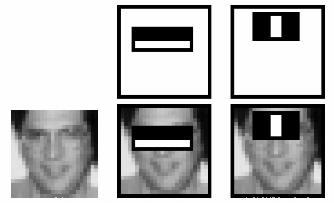


К сожалению, данный материал достаточно времязатратный из-за своей сложности. <b>Интересующимся помогут следующие материалы:</b>
1. https://youtu.be/hPCTwxF0qf4 - алгоритм в действии;
2. https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8_%D0%A5%D0%B0%D0%B0%D1%80%D0%B0 - священная Википедия;
3. https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html - доступный разбор материала в официальной документации OpenCV. Есть примеры кода на трёх языках (Python, Java, C++).

<b>BONUS</b>: https://www.youtube.com/watch?v=WfdYYNamHZ8&t=1807s - хардкорный видеоразбор на английском языке со всеми подробностями!

#### Цель: написать небольшую программу, которая сможет опознавать с относительно высокой точностью человеческие лица (вид спереди).

Глубоко вдохните. Выдохните.

Сейчас потребуется применить ВЕСЬ накопленный опыт за последние десятки минут Вашей жизни! Пора написать программу, выполняющую реальную инженерную задачу по распознаванию образа человеческого лица с применением каскадного классификатора по признакам Хаара. Также понадобится вспомнить как выполняются простейшие преобразования изображений и обработка выхода из программы.

#### НАПОМИНАНИЕ: чтобы запустить этот листинг, скопируйте код этого листинга и вставьте в <i>PyCharm IDE</i>.
```
import cv2

cameraPort = 0
frame_w = 640
frame_h = 480
keys = ('q', 'f', 'e', 'c')

cap = cv2.VideoCapture(cameraPort, cv2.CAP_DSHOW)
print('Ширина окна до преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Высота окна до преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_w)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_h)

print('Ширина окна после преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Высота окна после преобразования: ', round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(
            gray,
            scaleFactor=1.05,
            minNeighbors=5,
            minSize=(30, 30)
        )
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.imshow('Web-camera', frame)
    for k in keys:
        if cv2.waitKey(15) & 0xFF == ord(k):
            cap.release()

cv2.destroyAllWindows()

```

### CONGRATULATIONS!!! Теперь мы умеем больше...

<img src="joseph.jpg" style="height:200px"/>

<b>Что мы научились делать за наш мастер-класс?</b>

- Научились основам работы с языком программирования Python в прикладных задачах компьютерного зрения
- Изучили азы OpenCV - открытой библиотеки для решения задач компьютерного зрения
- Видоизменять изображения: их размер, цвета пикселей, разрешение, ориентацию в пространстве
- Писать и создавать графические объекты поверх наших изображений
- Работать с видео-форматом, транслировать изображение, поступающее с веб-камеры нашего компьютера
- ...и конечно же, РАСПОЗНАВАТЬ ЧЕЛОВЕЧЕСКИЕ ЛИЦА


Чем же это полезно для нашей повседневной учебной деятельности?Этот мастер-класс может стать отличным стартом для погружения в увлекательный мир компьютерного зрения, область применения которого в наше время ничем не ограничена. О применении алгоритмов и методов компьютерного зрения можно почитать в замечательной статье на Википедии: https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5

##### ...но всё ещё только впереди!

### Ресурсы и материалы для дальнейшего изучения:

<img src="calc_man.jpg" style="height:200px"/>

- https://answers.opencv.org/questions/ - официальный форум OpenCV
- https://docs.opencv.org/3.4/index.html - официальная документация OpenCV
- https://web.archive.org/web/20171204220159/http://www.makematics.com/research/viola-jones/ - как работают каскады Хаара или алгоритм Виолы-Джонса - интервью (англ.)
- https://realpython.com/python-opencv-color-spaces/ - статья о цветовой сегментации в OpenCV (англ.)
- https://www.youtube.com/watch?v=WfdYYNamHZ8&t=1807s - видеолекция про каскады Хаара и алгоритм Виолы-Джонса (англ.)
- https://ru.wikipedia.org/wiki/OpenCV - Вики-страничка про OpenCV. Содержит полезные ссылки в конце
- https://www.youtube.com/watch?v=kdLM6AOd2vc&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=1 - серия крайне информативных кратких уроков с обзором на всю библиотеку (англ.)

### Ваши будущие проекты уже ждут вас :)